<a href="https://colab.research.google.com/github/sijuswamy/MarianFDP/blob/main/Decision_Trees_Using_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.

The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees. 
Decision Trees are an important type of algorithm for predictive modeling machine learning.

The classical decision tree algorithms have been around for decades and modern variations like random forest are among the most powerful techniques available.

In this session you will discover the humble decision tree algorithm known by it’s more modern name **CART** which stands for Classification And Regression Trees. After reading this post, you will know:

- The many names used to describe the **CART** algorithm for machine learning.
- The representation used by learned CART models that is actually stored on disk.

-  How a CART model can be learned from training data.

- How a learned CART model can be used to make predictions on unseen data.
- Additional resources that you can use to learn more about CART and related algorithms.

## CART Model Representation

The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable ($x$) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable ($y$) which is used to make a prediction.

## Learn a CART Model From Data

Creating a CART model involves selecting input variables and split points on those variables until a suitable tree is constructed.

The selection of which input variable to use and the specific split or cut-point is chosen using a greedy algorithm to minimize a cost function. Tree construction ends using a predefined stopping criterion, such as a minimum number of training instances assigned to each leaf node of the tree.

## Greedy Splitting

Creating a binary decision tree is actually a process of dividing up the input space. A greedy approach is used to divide the space called recursive binary splitting.

This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected.

All input variables and all possible split points are evaluated and chosen in a greedy manner (e.g. the very best split point is chosen each time).

1. For regression predictive modeling problems the cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle (node).

2. For classification the Gini index function is used which provides an indication of how “pure” the leaf nodes are (how mixed the training data assigned to each node is).

$$G = \sum p_k \cdot (1 – p_k)$$

Where G is the Gini index over all classes,$ p_k$ are the proportion of training instances with class k in the rectangle of interest. A node that has all classes of the same type (perfect class purity) will have G=0, where as a G that has a 50-50 split of classes for a binary classification problem (worst purity) will have a G=0.5.

## Stopping Criterion
The recursive binary splitting procedure described above needs to know when to stop splitting as it works its way down the tree with the training data.

The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

The count of training members is tuned to the dataset, e.g. 5 or 10. It defines how specific to the training data the tree will be. Too specific (e.g. a count of 1) and the tree will overfit the training data and likely have poor performance on the test set.

## Pruning The Tree

The stopping criterion is important as it strongly influences the performance of your tree. You can use pruning after learning your tree to further lift performance.

The complexity of a decision tree is defined as the number of splits in the tree. Simpler trees are preferred. They are easy to understand (you can print them out and show them to subject matter experts), and they are less likely to overfit your data.

The fastest and simplest pruning method is to work through each leaf node in the tree and evaluate the effect of removing it using a hold-out test set. Leaf nodes are removed only if it results in a drop in the overall cost function on the entire test set. You stop removing nodes when no further improvements can be made.

More sophisticated pruning methods can be used such as cost complexity pruning (also called weakest link pruning) where a learning parameter (alpha) is used to weigh whether nodes can be removed based on the size of the sub-tree.

## Advantages and disadvantages of using CART

*Some advantages of decision trees are*:

1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
3. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
4. Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
5. Able to handle multi-output problems.
6. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
7. Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
8. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

*The notable disadvantages of decision trees are*:

1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
3. The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
4. There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
5. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

## CART algorithm using Scikit-Learn library

### For Classification

**DecisionTreeClassifier** is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array $X$, sparse or dense, of size $[n-samples, n-features]$  holding the training samples, and an array $Y$ of integer values, size $[n_samples]$ , holding the class labels for the training samples:

**Syntax**:

*DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)*

## Simple example



Generate a CART model to classify the datasets to the classes $0$ and $1$. Use $(0,0,0),(1,0,1)$ to train the model. (assume the last element in the ordered 3-tuple as the class label.)

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)## train the model

In [ ]:
clf.predict([[2.0, 2.0]])## run the model on new data


array([1])

In [ ]:
clf.predict_proba([[2., 2.]])## predict the probability of classification


array([[0., 1.]])

## Creating Tree visualizations

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("sample")

'sample.pdf'

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

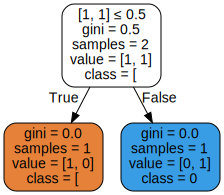

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X,  
                     class_names=str(Y),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Decision trees can also be applied to regression problems, using the *DecisionTreeRegressor class*.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

### Example

In [ ]:
from sklearn import tree
X = [[0, 0], [2, 2],[0.5,0.5],[3,2],[7,3],[6,5]]
y = [0.5, 2.5, 1, 3, 5.5, 6]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([1.])

### Regression Tree




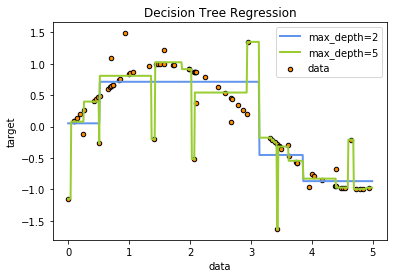

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

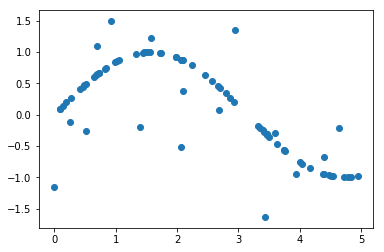

In [ ]:
plt.scatter(X,y)

## Decision Tree Classification of Iris data set


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

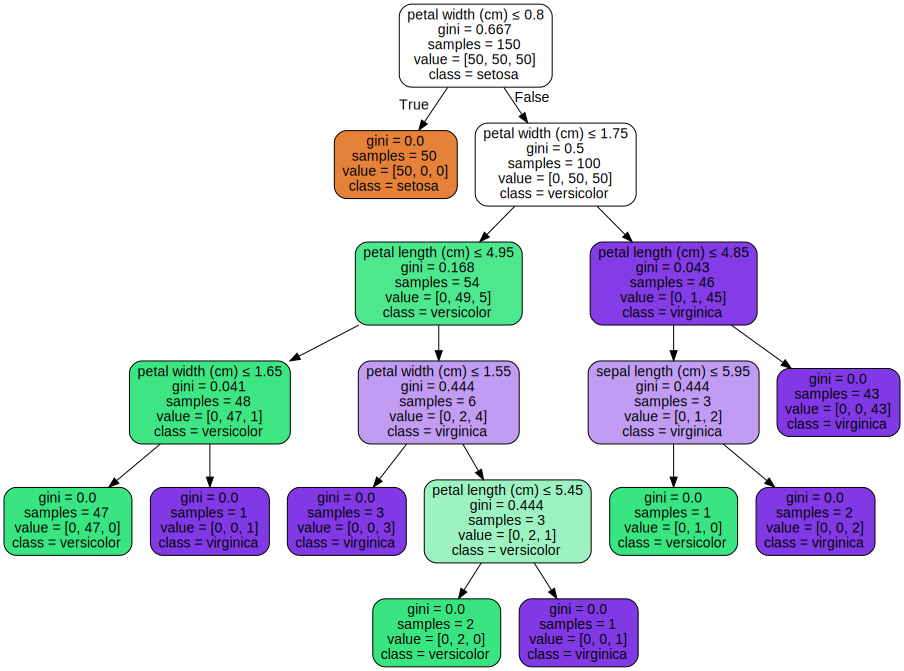

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Two dimensional Visualization of Classification

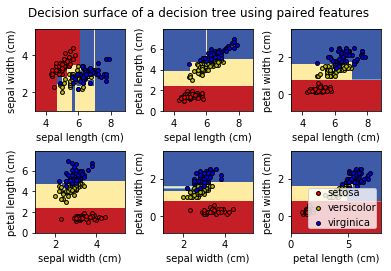

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()